In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import folium

#displaying the maximum number of rows and columns
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns', None)

In [ ]:
#reading the dataset as a pandas dataframe
filename = "US_Accidents_Dec21_updated.csv"
df = pd.read_csv(filename)

In [ ]:
#displaying the first 5 rows of the dataset
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
#displaying the size of the dataset
df.shape

(2845342, 47)

In [ ]:
#displaying all the columns present in the dataset
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
#dispalying the data types of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
#displaying the statistics of all the numerical columns present in the dataset
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
#displaying only the number of numeric columns in the data 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numeric = df.select_dtypes(include=numerics)
len(df_numeric.columns)

14

In [ ]:
#percentage of missing values per column
missing_percentages = df.isnull().sum()/df.shape[0]*100
missing_percentages

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   61.290031
Street                    0.000070
Side                      0.000000
City                      0.004815
County                    0.000000
State                     0.000000
Zipcode                   0.046356
Country                   0.000000
Timezone                  0.128596
Airport_Code              0.335601
Weather_Timestamp         1.783125
Temperature(F)            2.434646
Wind_Chill(F)            16.505678
Humidity(%)               2.568830
Pressure(in)              2.080593
Visibility(mi)            2.479350
Wind_Direction            2.592834
Wind_Speed(mph)           5.550967
Precipitation(in)   

In [ ]:
type(missing_percentages)

pandas.core.series.Series

<AxesSubplot:>

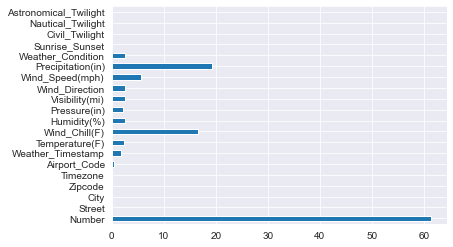

In [ ]:
#choosing the columns that have missing values and plotting them
missing_percentages[missing_percentages != 0].plot(kind='barh')

## Exploratory Data Analysis

In [ ]:
#city
#start time
#start lat, start lng
#temperature
#weather condition

In [ ]:
df['City'].nunique()

11681

In [ ]:
#number of accidents per city
cities = df['City'].value_counts()
cities

Miami               106966
Los Angeles          68956
Orlando              54691
Dallas               41979
Houston              39448
                     ...  
Stephens                 1
Apalachicola             1
Canandaigua              1
Kill Devil Hills         1
Butlerville              1
Name: City, Length: 11681, dtype: int64

In [ ]:
cities[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

<AxesSubplot:>

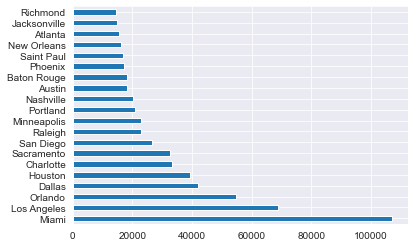

In [ ]:
cities[:20].plot(kind='barh')

/Users/poulomipal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

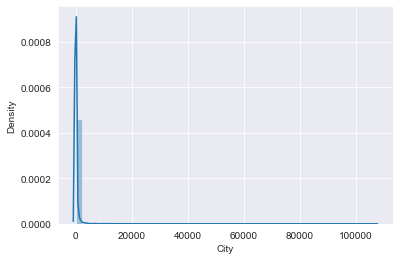

In [ ]:
sns.distplot(cities)

Distribution of accidents: most of the cities have very few accidents, around 2000

In [ ]:
#creating two buckets, for cities with greater than 1000 accidents and lower than 1000 accidents
high_accident_cities = cities[cities>=1000]
low_accident_cities = cities[cities<1000]

In [ ]:
#number of high accident cities
len(high_accident_cities)/df['City'].nunique()

0.04246211796935194

Only 4% of total cities have >1000 accidents

/Users/poulomipal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

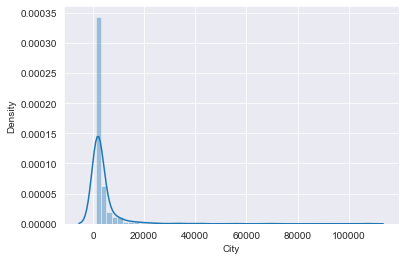

In [ ]:
sns.distplot(high_accident_cities)

In [ ]:
len(low_accident_cities)/df['City'].nunique()

0.957537882030648

/Users/poulomipal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

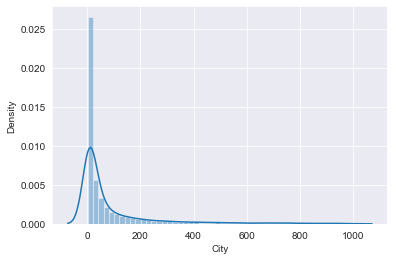

In [ ]:
sns.distplot(low_accident_cities)

<AxesSubplot:xlabel='City', ylabel='Count'>

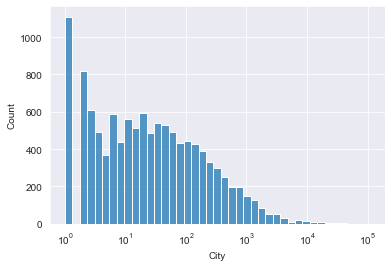

In [ ]:
sns.histplot(cities, log_scale=True)

In [ ]:
cities[cities == 1]

Medicine Lake       1
Tuscola             1
Ruso                1
Buckatunna          1
Muskego             1
                   ..
Stephens            1
Apalachicola        1
Canandaigua         1
Kill Devil Hills    1
Butlerville         1
Name: City, Length: 1110, dtype: int64

### Start time

In [ ]:
df['Start_Time']

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], infer_datetime_format=True)

/Users/poulomipal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

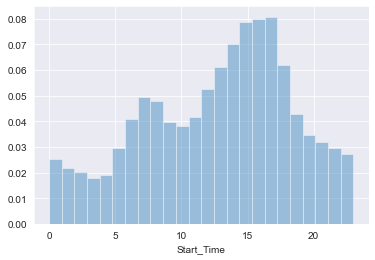

In [ ]:
#percentages on the y axis
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

A high percentage of accidents occur between 6 - 10 am (may be because people are in a rush to get to work) and the next highest percentage of accidents occur between 3 to 6 pm 

<AxesSubplot:xlabel='Start_Time'>

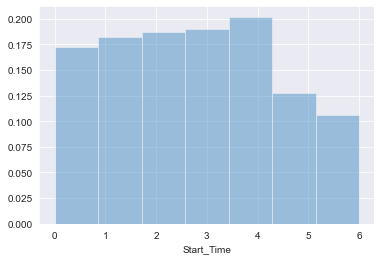

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

#### Is the distribution of accidents by hour the same on weekends as on weekdays?


/Users/poulomipal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

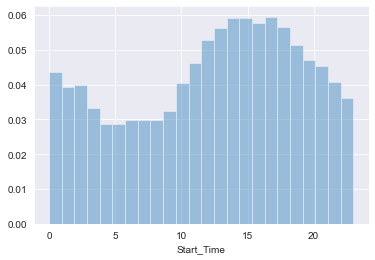

In [ ]:
start_time_sundays = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(start_time_sundays.dt.hour, bins=24, kde=False, norm_hist=True)

/Users/poulomipal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

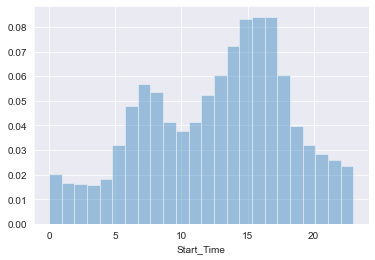

In [ ]:
start_time_mondays = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(start_time_mondays.dt.hour, bins=24, kde=False, norm_hist=True)

The distribution of accidents by hour is different on weekends than on weekdays. On Sundays, peak occurs from 12:30 to 4:30 pm

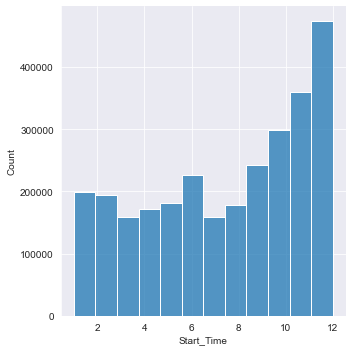

In [ ]:
sns.displot(df.Start_Time.dt.month, bins=12, kind='hist')

Most of the accidents occur during the last quarter of the year

In [ ]:
df['Start_Time'].dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
2845337    2019
2845338    2019
2845339    2019
2845340    2019
2845341    2019
Name: Start_Time, Length: 2845342, dtype: int64

<AxesSubplot:ylabel='Start_Time'>

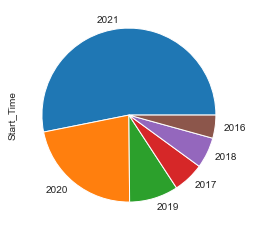

In [ ]:
#Distribution of accidents over the years
df.Start_Time.dt.year.value_counts().plot(kind='pie')

The occurrence of accidents have increased over the years

/Users/poulomipal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

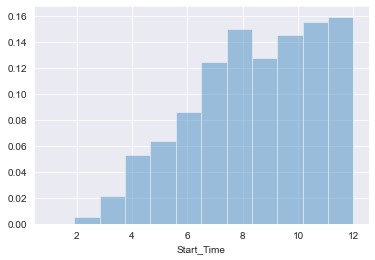

In [ ]:
df_2016 = df[df['Start_Time'].dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

For year 2016, the number of accidents were very few only during the first quarter but it increased after that.

/Users/poulomipal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

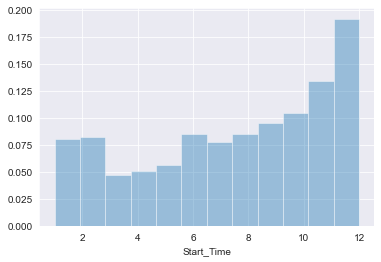

In [ ]:
df_2021 = df[df['Start_Time'].dt.year == 2021]
sns.distplot(df_2021.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

/Users/poulomipal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

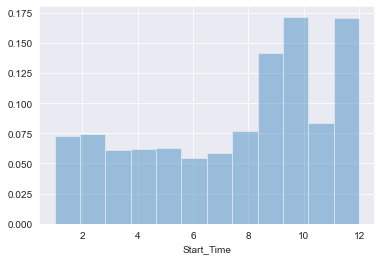

In [ ]:
df_2019 = df[df['Start_Time'].dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

For year 2019, there's a sudden dip in the number of accidents reported for month of November which is similar to the rest of the months, except for September through December

### Start Latitude and Longitude

In [ ]:
df['Start_Lat']

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [ ]:
df['Start_Lng']

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [ ]:
#using 10% of the data
sample_df = df.sample(int(0.1 * len(df)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

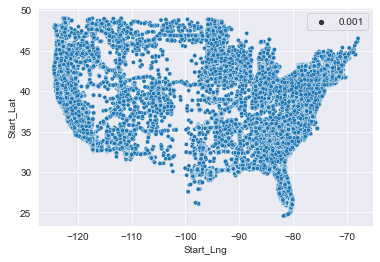

In [ ]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [ ]:
latitude, longitude = df['Start_Lat'][0], df['Start_Lng'][0]
latitude, longitude

(40.10891, -83.09286)

In [ ]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

512276     33.902794
376328     25.702610
1200664    32.495916
2643114    33.435920
2351530    33.661710
270263     27.999845
1615670    34.901988
1380422    25.893096
1973875    30.309594
615351     32.755198
533455     40.291101
2327735    44.276900
1921967    38.796141
1725210    34.142750
1638035    42.746240
248964     33.972627
2383960    32.779430
930304     35.545469
753419     39.420625
1815014    25.702180
1300288    30.128008
939530     34.047045
1838537    35.608373
2773277    45.506011
2647772    42.804420
99849      40.722670
43251      40.571560
2278590    39.140650
445314     27.996135
2628540    42.013720
2509186    40.699940
195456     45.493070
1498166    37.837807
392302     28.549871
1891110    32.826379
2621171    27.585010
1565437    33.884156
1749632    35.035990
313889     25.578724
1131375    30.439729
95406      40.521790
1836379    37.663322
2018781    29.965630
1532802    41.534861
988619     37.902665
3083       37.701540
1445848    43.156420
420787     26

In [ ]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [ ]:
from folium.plugins import HeatMap

In [ ]:
#using a sample of the entire data
sample_df = df.sample(int(.001 * len(df)))
pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(pairs).add_to(map)
map

#### Questions
1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest number of accidents? How about per capita?
3. Among the top 100 cities with highest acidents, which states do they belong to?
4. Why is New York not present, despite beig the most populous city?
5. Which states does the top 100 cities with number of accidents belong to?
6. Which time of the day has maximum accidents? Similarly which days or months of the year have accidents more frequently?
7. What is the trend of the accidents over the years in this data?
8. When is the accidents per unit of the traffic the highest?

#### Insights
1. New York is not present in the data despite being the most populous city
2. Only 4% of cities have more than 1000 yearly accidents (less than 5%)
3. Number of accidents per city decreases exponentially 
4. Around 1100 cities have just reported one accident
5. A high percentage of accidents occur between 6 - 10 am (may be because people are in a rush to get to work) and the next highest percentage of accidents occur between 3 to 6 pm 
6. The distribution of accidents by hour is different on weekends than on weekdays. On Sundays, peak occurs from 12:30 to 4:30 pm
7. Most accidents occur during the last quarter of the year
8. The occurrence of accidents is more frequent during the last quarter of the year
9. The occurrence of accidents have increased over the years

